# Plotting sequence logos

This notebook shows how to display TCR sequence logos.

The example data is from [Dash et al. Nature 2017](https://doi.org/10.1038/nature22383).

In [1]:
import numpy as np
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp
import matplotlib.pyplot as plt

In [2]:
cdr3_columns = {'alpha': 'cdr3_a_aa',
                'beta' : 'cdr3_b_aa'}

In [3]:
!wget https://raw.githubusercontent.com/kmayerb/tcrdist3/master/dash_human.csv -O data/dash_human.csv > /dev/null 2>&1

In [4]:
d = pd.read_csv('data/dash_human.csv')

In [5]:
epitope = 'BMLF'
depitope = d[d['epitope']==epitope]
linkage, cluster = rs.hierarchical_clustering((depitope[cdr3_columns['alpha']],
                                               depitope[cdr3_columns['beta']]))

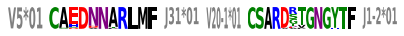

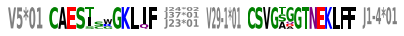

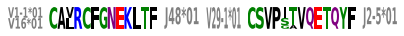

In [6]:
cluster_number, count = np.unique(cluster, return_counts=True)
for cl in cluster_number[count>3]:
    tcrs = depitope[cluster==cl]

    fig, axes = plt.subplots(ncols=6, nrows=1, sharey=True, figsize=(7.0, 0.4),
                         gridspec_kw=dict(width_ratios=(1, 3, 1, 1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
    chain = 'alpha'
    rsp.seqlogos_vj(tcrs, cdr3_columns[chain],
                                 'v_{c}_gene'.format(c=chain[0]),
                                 'j_{c}_gene'.format(c=chain[0]),
                   axes=axes[:3])
    chain = 'beta'
    rsp.seqlogos_vj(tcrs, cdr3_columns[chain],
                                 'v_{c}_gene'.format(c=chain[0]),
                                 'j_{c}_gene'.format(c=chain[0]),
                   axes=axes[3:]);

We can also use this procedure to plot individual sequences without any alignment).

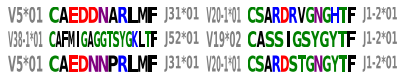

In [7]:
fig, axes = plt.subplots(ncols=6, nrows=3, sharey=True, figsize=(7.0, 1.2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1, 1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
for row, i in enumerate([32, 100, 50]):
    chain = 'alpha'
    rsp.seqlogos_vj(d.iloc[i:i+1], cdr3_columns[chain],
                                 'v_{c}_gene'.format(c=chain[0]),
                                 'j_{c}_gene'.format(c=chain[0]),
                   axes=axes[row, :3])
    chain = 'beta'
    rsp.seqlogos_vj(d.iloc[i:i+1], cdr3_columns[chain],
                                 'v_{c}_gene'.format(c=chain[0]),
                                 'j_{c}_gene'.format(c=chain[0]),
                   axes=axes[row, 3:])